In [ ]:
"""
1. Collect data with an ultrasonic sensor (HC-SR04) for a known and static environment with
one object placed in the range of the sensor.
_____________________________________________________________________________________________

Object 1 : Metal Box placed at distance 20cm
_________
Measured Distance = 18.8 cm
Measured Distance = 10.5 cm
Measured Distance = 18.7 cm
Measured Distance = 20.1 cm
Measured Distance = 18.7 cm
Measured Distance = 17.9 cm
Measured Distance = 20.2 cm
Measured Distance = 18.7 cm
Measured Distance = 18.8 cm
Measured Distance = 18.7 cm
Measured Distance = 18.8 cm
Measured Distance = 19.6 cm
Measured Distance = 18.7 cm
Measured Distance = 18.8 cm
Measured Distance = 18.8 cm
Measured Distance = 18.8 cm
Measured Distance = 18.8 cm
Measured Distance = 18.7 cm
Measured Distance = 15.8 cm

"""

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
measurements = [18.8,10.5,18.7,20.1,18.7,17.9,20.2,18.7,18.8,18.7,18.8,19.6,18.7,18.8,18.8,18.8,18.8,18.7,15.8,0]

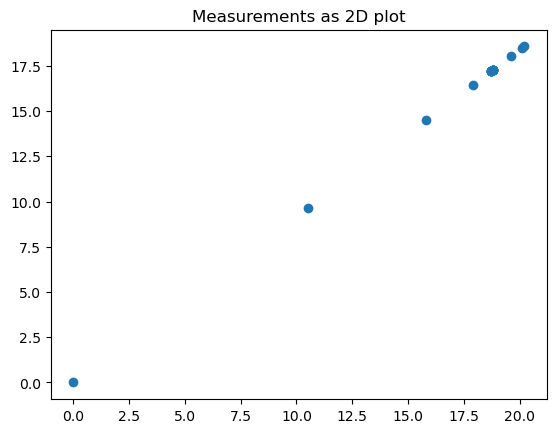

In [21]:
"""
a. Plot the data in a 2D coordinate frame.
"""
theta = 73
x = np.array(measurements)
y = np.tan(theta)*x
plt.scatter(x,y)
plt.title('Measurements as 2D plot') 
plt.draw() 
plt.show() 

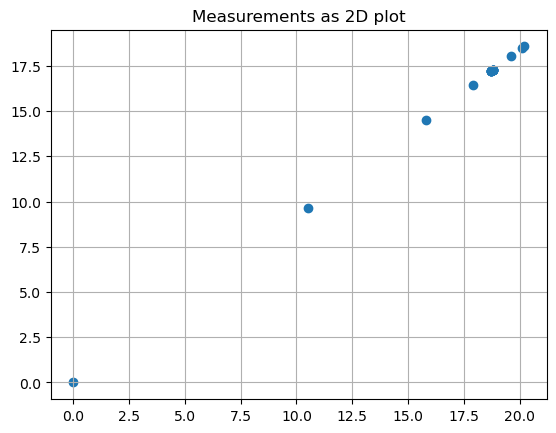

In [22]:
"""
b. Divide the area of the map in a suitable grid division and show in the plot.
"""
theta = 73
x = np.array(measurements)
y = np.tan(theta)*x
plt.scatter(x,y)
plt.grid(True)
plt.title('Measurements as 2D plot') 
plt.draw() 
plt.show()

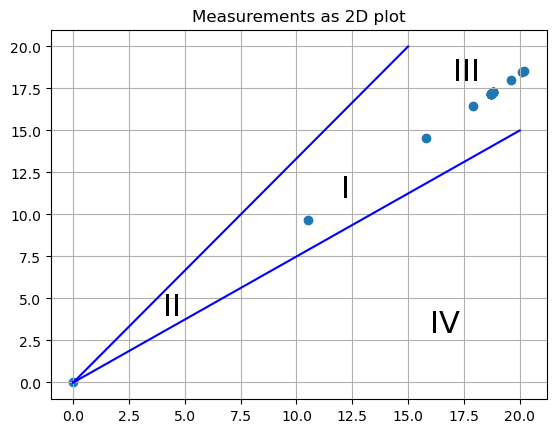

In [23]:
"""
c. Divide the grid map in 4 zones (I, II, III, & IV as discussed in the class) and show in the
diagram. Explain the reason for the division of the zones.
"""
theta = 73
x = np.array(measurements)
y = np.tan(theta)*x
line1_x = [0,7.5,15]
line1_y = [0,10,20]
line2_x = [0,10,20]
line2_y = [0,7.5,15]
plt.scatter(x,y)
plt.plot(line1_x,line1_y, color = 'blue')
plt.plot(line2_x,line2_y, color = 'blue')
plt.grid(True)
plt.text(12, 11, 'I', fontsize = 22)
plt.text(4, 4, 'II', fontsize = 22)
plt.text(17, 18, 'III', fontsize = 22)
plt.text(16, 3, 'IV', fontsize = 22)
plt.title('Measurements as 2D plot') 
plt.draw() 
plt.show()

Reason for the division of the zones is based on the Occupancy Grid method discussed in class, 
The closest zone is II, and then follows zone I and III, and zone IV is other region out of the cone part of sensor

In [ ]:
"""
d. Use the occupancy grid method to calculate the probability of the occupancy of each
grid for zone I and II only. Fit the occupancy of this 2d map with an approximate surface
module, where the height of the surface at any grid location is the probability of
occupancy value.
"""


[z(x, y; c1, c2) = c1*x**2 + c1*y**2 + c2*x*y]

Parameter Value        Standard Deviation
c1        -2.456804e-03 7.198344e-03
c2        9.251721e-01 1.476482e-02
Status message         Optimization terminated successfully.
Number of iterations   7
Objective              <symfit.core.objectives.LeastSquares object at 0x000001844E5697C0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x000001844E5695E0>

Goodness of fit qualifiers:
chi_squared            83325.00904189842
objective_value        41662.50452094921
r_squared              0.977303465336504


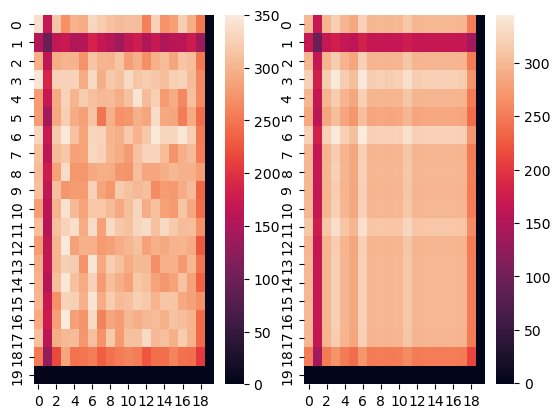

In [24]:
"""
Reference : https://symfit.readthedocs.io/en/stable/examples/ex_poly_surface_fit.html
"""
from symfit import Poly, variables, parameters, Model, Fit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

p = np.polyfit(np.array(measurements), np.tan(theta)*np.array(measurements), 2)
x, y, z = variables('x, y, z')
c1, c2 = parameters('c1, c2')
# Make a polynomial. Note the `as_expr` to make it symfit friendly.
model_dict = {
    z: Poly( {(2, 0): c1, (0, 2): c1, (1, 1): c2}, x ,y).as_expr()
}
model = Model(model_dict)
print(model)

# Generate example data
x_vec = np.array(measurements)
y_vec = np.tan(theta)*x_vec
xdata, ydata = np.meshgrid(x_vec, y_vec)
zdata = model(x=xdata, y=ydata, c1=np.round(p[0],2), c2=np.round(p[1],2)).z
zdata = np.random.normal(zdata, 0.05 * zdata)  # add 5% noise

# Perform the fit
fit = Fit(model, x=xdata, y=ydata, z=zdata)
fit_result = fit.execute()
zfit = model(x=xdata, y=ydata, **fit_result.params).z
print(fit_result)

fig, (ax1, ax2) = plt.subplots(1, 2)
sns.heatmap(zdata, ax=ax1)
sns.heatmap(zfit, ax=ax2)
plt.show()

[z(x, y; c1, c2) = c1*x**2 + c1*y**2 + c2*x*y]


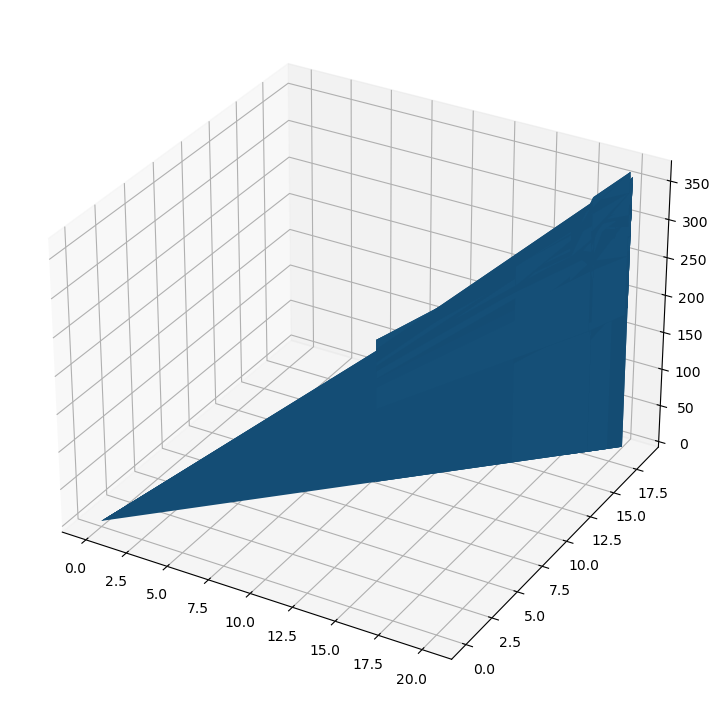

In [25]:
"""
A surface plot in a 3D coordinate system for the same data
"""
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
p = np.polyfit(np.array(measurements), np.tan(theta)*np.array(measurements), 2)
x, y, z = variables('x, y, z')
c1, c2 = parameters('c1, c2')
# Make a polynomial. Note the `as_expr` to make it symfit friendly.
model_dict = {
    z: Poly( {(2, 0): c1, (0, 2): c1, (1, 1): c2}, x ,y).as_expr()
}
model = Model(model_dict)
print(model)

# Generate example data
x_vec = np.array(measurements)
y_vec = np.tan(theta)*x_vec
xdata, ydata = np.meshgrid(x_vec, y_vec)
zdata = model(x=xdata, y=ydata, c1=np.round(p[0],2), c2=np.round(p[1],2)).z
zdata = np.random.normal(zdata, 0.05 * zdata)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x_vec, y_vec, zdata)
 
# show plot
plt.show()